## imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from  dl.nn.nn import NeuralNetwork as network
from  dl.nn import layers as layers
from  dl.nn import losses as losses
from dl.nn import activations as activations
from utils.metrics import Metrics as metrics
from utils import optimizers as optimizers

## MNIST Fashion (CNN)

In [2]:
# load MNIST Digits dataset from keras

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the data
x_train = x_train/255.
x_test = x_test/255.

# Flatten the images
x_train = x_train.reshape(-1, 1, 28,28)[:1000]
x_test = x_test.reshape(-1, 1, 28,28)[:1000]

y_test = y_test[:1000]
y_train = y_train[:1000]

# one-hot encode the labels
y_oh_train = pd.get_dummies(y_train).values
y_oh_test = pd.get_dummies(y_test).values

2023-03-13 01:08:42.837916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
digits = network()

digits.add(layers.ConvLayer(input_shape=(28,28,1), filters=9, kernel_size=(3,3), padding='valid', use_bias=True, strides=1))  
digits.add(layers.ActivationLayer(activations.Tanh)) 
digits.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))


digits.add(layers.FlattenLayer())
digits.add(layers.DenseLayer( units=10, activation="softmax"))                

digits.compile(loss=losses.CategoricalCrossentropy(), optimizer=optimizers.Adam(lr=0.01), initializer="glorot_uniform", metrics=["accuracy", "precision"])

digits.summary()
digits.fit(x_train, y_oh_train, epochs=20, batch_size=32, verbose=2)

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               3              -              (3, None)      -              -                       0

ConvLayer           9              (28, 28, 1)    ((26, 26, 9),) (3, 3, 1, 9)   (9, 1)                 90

ActivationLayer     -              activavtion    Tanh           -              -                       0

MaxPool2D           -              (26, 26, 9)    ((13, 13, 9),) -              -                       0

FlattenLayer        -              -              -              -              -                       0

DenseLayer          10             (1521,)        (10,)          (10, 1521)     (10, 1)             15220

Total params                                                                                        15310


In [5]:
prob_pred = digits.predict(x_test)

# pred = np.argmax(prob_pred, axis=1).reshape(-1)
pred= metrics.predict_classes(prob_pred)

print("Accuracy: ", metrics.accuracy(y_test, pred))

Accuracy:  0.754


## XNOR Gate (Binary Neural Network)

In [5]:
# training data
x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([[0], [1], [1], [0]])


# network
net = network()

net.add(layers.DenseLayer(input_shape=(2), units=8, use_bias=False))
net.add(layers.ActivationLayer(activations.Tanh))
net.add(layers.DenseLayer(units= 4, activation="tanh"))
net.add(layers.DropoutLayer(0.1))
# net.add(layers.BatchNormalization(4))
net.add(layers.DenseLayer(units=1, activation="sigmoid"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)

# net.use_loss(MSE_loss)
net.compile(loss=losses.BinaryCrossentropy(), optimizer=optimizers.GradientDescent(lr=0.9), initializer="glorot_uniform")


In [6]:
net.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               2              -              (2, None)      -              -                       0

DenseLayer          8              (2,)           (8,)           (8, 2)         0                      16

ActivationLayer     -              activavtion    Tanh           -              -                       0

DenseLayer          4              (8,)           (4,)           (4, 8)         (4, 1)                 36

DropoutLayer        -              droupout rate: 0.1            -              -                       0

DenseLayer          1              (4,)           (1,)           (1, 4)         (1, 1)                  5

Total params                                                                                           57


In [7]:
net.fit(x_train, y_train, epochs=100, verbose=2)

# test
out = net.predict(x_train)
print(out)

Epoch 1-100 ======================> cost: 0.8679 
Epoch 2-100 ======================> cost: 0.6794 
Epoch 3-100 ======================> cost: 0.6150 
Epoch 4-100 ======================> cost: 0.5943 
Epoch 5-100 ======================> cost: 0.5840 
Epoch 6-100 ======================> cost: 0.5747 
Epoch 7-100 ======================> cost: 0.5664 
Epoch 8-100 ======================> cost: 0.5728 
Epoch 9-100 ======================> cost: 0.5681 
Epoch 10-100 ======================> cost: 0.5591 
Epoch 11-100 ======================> cost: 0.5493 
Epoch 12-100 ======================> cost: 0.5454 
Epoch 13-100 ======================> cost: 0.5401 
Epoch 14-100 ======================> cost: 0.5345 
Epoch 15-100 ======================> cost: 0.5366 
Epoch 16-100 ======================> cost: 0.5268 
Epoch 17-100 ======================> cost: 0.5216 
Epoch 18-100 ======================> cost: 0.5201 
Epoch 19-100 ======================> cost: 0.5206 
Epoch 20-100 ======================> cos

In [8]:
xor_pred = np.round(out)

metrics.accuracy(y_train, xor_pred)

1.0

## Breast Cancer (Binary Neural Network)

In [9]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

data_df = pd.DataFrame(data = data.data,
                       columns = data.feature_names)
data_df.shape

(569, 30)

In [10]:
breast_net = network()

breast_net.add(layers.DenseLayer(input_shape=(30), units=64, activation="tanh"))
# breast_net.add(ActivationLayer(Tanh))

breast_net.add(layers.DenseLayer( units=128, activation="tanh"))
# breast_net.add(ActivationLayer(Tanh))

breast_net.add(layers.DropoutLayer(0.2))

breast_net.add(layers.DenseLayer( units=32, activation="tanh"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)
# breast_net.add(ActivationLayer(Tanh))

breast_net.add(layers.DenseLayer( units=1, activation="sigmoid"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)
# breast_net.add(ActivationLayer(Sigmoid))

breast_net.compile(loss=losses.BinaryCrossentropy(), optimizer=optimizers.Adam(lr=0.001), initializer="glorot_uniform")

breast_net.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               30             -              (30, None)     -              -                       0

DenseLayer          64             (30,)          (64,)          (64, 30)       (64, 1)              1984

DenseLayer          128            (64,)          (128,)         (128, 64)      (128, 1)             8320

DropoutLayer        -              droupout rate: 0.2            -              -                       0

DenseLayer          32             (128,)         (32,)          (32, 128)      (32, 1)              4128

DenseLayer          1              (32,)          (1,)           (1, 32)        (1, 1)                 33

Total params                                                                                        14465


In [11]:
# y_breast = np.array(pd.get_dummies(data.target))
y_breast = data.target
breast_net.fit(x_train=data.data,y_train= y_breast, epochs=10, verbose=2)

Epoch 1-10 ======================> cost: 0.6230 
Epoch 2-10 ======================> cost: 0.5528 
Epoch 3-10 ======================> cost: 0.4562 
Epoch 4-10 ======================> cost: 0.3732 
Epoch 5-10 ======================> cost: 0.3220 
Epoch 6-10 ======================> cost: 0.2951 
Epoch 7-10 ======================> cost: 0.2984 
Epoch 8-10 ======================> cost: 0.3516 
Epoch 9-10 ======================> cost: 0.2758 
Epoch 10-10 ======================> cost: 0.2599 


In [12]:
pred_breast = breast_net.predict(data.data)

pred_breast = np.round(pred_breast).reshape(-1)

print("Accuracy: ", metrics.accuracy(y_breast, pred_breast))
print("Precision: ", metrics.precision(y_breast, pred_breast, average="binary"))
print("Recall: ", metrics.recall(y_breast, pred_breast, average="binary"))

Accuracy:  0.9050966608084359
Precision:  0.887468030690537
Recall:  0.9719887955182073


In [13]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics as sk_metrics

print(f"Accuracy: {sk_metrics.accuracy_score(y_breast, pred_breast)}")
print(f"Precision: {sk_metrics.precision_score(y_breast, pred_breast)}")
print(f"Recall: {sk_metrics.recall_score(y_breast, pred_breast)}")


Accuracy: 0.9050966608084359
Precision: 0.887468030690537
Recall: 0.9719887955182073


## Moon (Binary Neural Network)

In [14]:
import sklearn
import sklearn.datasets
X, y = sklearn.datasets.make_moons(500, noise=0.30)

moon_net = network()

moon_net.add(layers.DenseLayer(input_shape=(2), units= 16, activation="tanh"))

moon_net.add(layers.DenseLayer(units= 8, activation="tanh"))

moon_net.add(layers.DropoutLayer(0.5))

moon_net.add(layers.DenseLayer(units= 1, activation="sigmoid"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)

moon_net.compile(loss=losses.BinaryCrossentropy(), optimizer=optimizers.Adam(lr=0.001))

moon_net.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               2              -              (2, None)      -              -                       0

DenseLayer          16             (2,)           (16,)          (16, 2)        (16, 1)                48

DenseLayer          8              (16,)          (8,)           (8, 16)        (8, 1)                136

DropoutLayer        -              droupout rate: 0.5            -              -                       0

DenseLayer          1              (8,)           (1,)           (1, 8)         (1, 1)                  9

Total params                                                                                          193


In [15]:
moon_net.fit(X, y, epochs=300, verbose=1, batch_size=32)

Epoch 1-300 ======================> cost: 0.6077 
Epoch 11-300 ======================> cost: 0.4264 
Epoch 21-300 ======================> cost: 0.3910 
Epoch 31-300 ======================> cost: 0.3830 
Epoch 41-300 ======================> cost: 0.3809 
Epoch 51-300 ======================> cost: 0.3795 
Epoch 61-300 ======================> cost: 0.3780 
Epoch 71-300 ======================> cost: 0.3766 
Epoch 81-300 ======================> cost: 0.3747 
Epoch 91-300 ======================> cost: 0.3739 
Epoch 101-300 ======================> cost: 0.3712 
Epoch 111-300 ======================> cost: 0.3683 
Epoch 121-300 ======================> cost: 0.3653 
Epoch 131-300 ======================> cost: 0.3602 
Epoch 141-300 ======================> cost: 0.3547 
Epoch 151-300 ======================> cost: 0.3472 
Epoch 161-300 ======================> cost: 0.3386 
Epoch 171-300 ======================> cost: 0.3307 
Epoch 181-300 ======================> cost: 0.3188 
Epoch 191-300 =========

In [16]:
moon_pred = moon_net.predict(X)

# as this is also a binary classification, we need to reshape the output to 1D array
moon_pred = np.round(moon_pred).reshape(-1)

print("Accuracy: ", metrics.accuracy(y, moon_pred))
print("Precision: ", metrics.precision(y, moon_pred, average="binary"))
print("Recall: ", metrics.recall(y, moon_pred, average="binary"))
print("R2: ", metrics.r2_score(y, moon_pred))

Accuracy:  0.908
Precision:  0.8923076923076924
Recall:  0.928
R2:  0.632


In [17]:
print("Accuracy: ", sk_metrics.accuracy_score(y, moon_pred))
print("Precision: ", sk_metrics.precision_score(y, moon_pred))
print("Recall: ", sk_metrics.recall_score(y, moon_pred))
print("R2: ", sk_metrics.r2_score(y, moon_pred))

Accuracy:  0.908
Precision:  0.8923076923076924
Recall:  0.928
R2:  0.632


## MNIST Fashion Recognition (10 classes)

In [18]:
# load MNIST Fashion dataset from keras

from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# normalize the data
x_train = x_train/255.
x_test = x_test/255.

# Flatten the images
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

2023-03-13 01:16:43.940728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
precisions_ = []
accuracies_ = []
recalls_ = []
f1s_ = []
losses_ = []


def callback(true, predicted, loss, epoch):
    losses_.append(loss)
    pred  = metrics.predict_classes(predicted)
    # print(pred.shape)
    global precisions_
    global accuracies_
    global recalls_
    global f1s_
    precisions_.append(metrics.precision(true, pred))
    accuracies_.append(metrics.accuracy(true, pred))
    recalls_.append(metrics.recall(true, pred))
    f1s_.append(metrics.f1_score(true, pred))

In [34]:
digits = network()

digits.add(layers.DenseLayer(input_shape=(28*28), units=20, activation="relu"))              

digits.add(layers.DenseLayer( units=10, activation="relu"))                

digits.add(layers.DropoutLayer(dropout_rate=0.2))

digits.add(layers.DenseLayer( units= 8, activation="relu"))

digits.add(layers.BatchNormalization(8))

digits.add(layers.DenseLayer( units=10, activation="softmax"))                   

digits.compile(loss=losses.CategoricalCrossentropy(), optimizer=optimizers.Adam(lr=0.001), initializer="glorot_uniform", metrics=["accuracy"])

digits.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               784            -              (784, None)    -              -                       0

DenseLayer          20             (784,)         (20,)          (20, 784)      (20, 1)             15700

DenseLayer          10             (20,)          (10,)          (10, 20)       (10, 1)               210

DropoutLayer        -              droupout rate: 0.2            -              -                       0

DenseLayer          8              (10,)          (8,)           (8, 10)        (8, 1)                 88

BatchNormalization  -              epsilon:       1e-08          -              -                       -

DenseLayer          10             (8,)           (10,)          (10, 8)        (10, 1)                90


In [35]:
y_oh = np.array(pd.get_dummies(y_train))
digits.fit(x_train, y_oh, epochs=30,  batch_size=32, verbose=1, callback=callback)

Epoch 1-30 ======================> cost: 0.7253 accuracy: 0.7517 
Epoch 11-30 ======================> cost: 0.3879 accuracy: 0.8610 
Epoch 21-30 ======================> cost: 0.3460 accuracy: 0.8774 


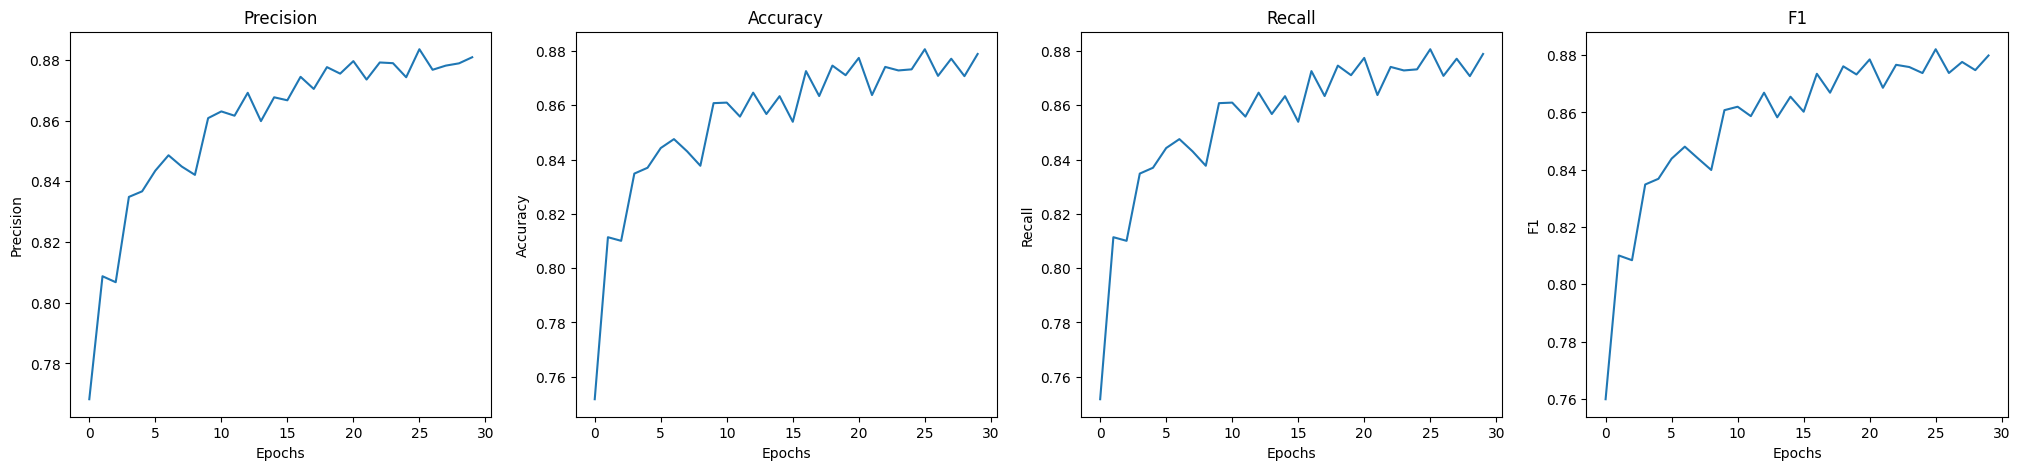

In [36]:
def plot_metrics(metrics, titles):
    # plot all the metrics in one plot

    fig, ax = plt.subplots(1, len(metrics), figsize=(25, 5))
    if len(metrics) == 1:
        ax = [ax]

    for i, metric in enumerate(metrics):
        ax[i].plot(metric)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Epochs")
        ax[i].set_ylabel(titles[i])
    plt.show()

plot_metrics([precisions_, accuracies_, recalls_, f1s_], ["Precision", "Accuracy", "Recall", "F1"])

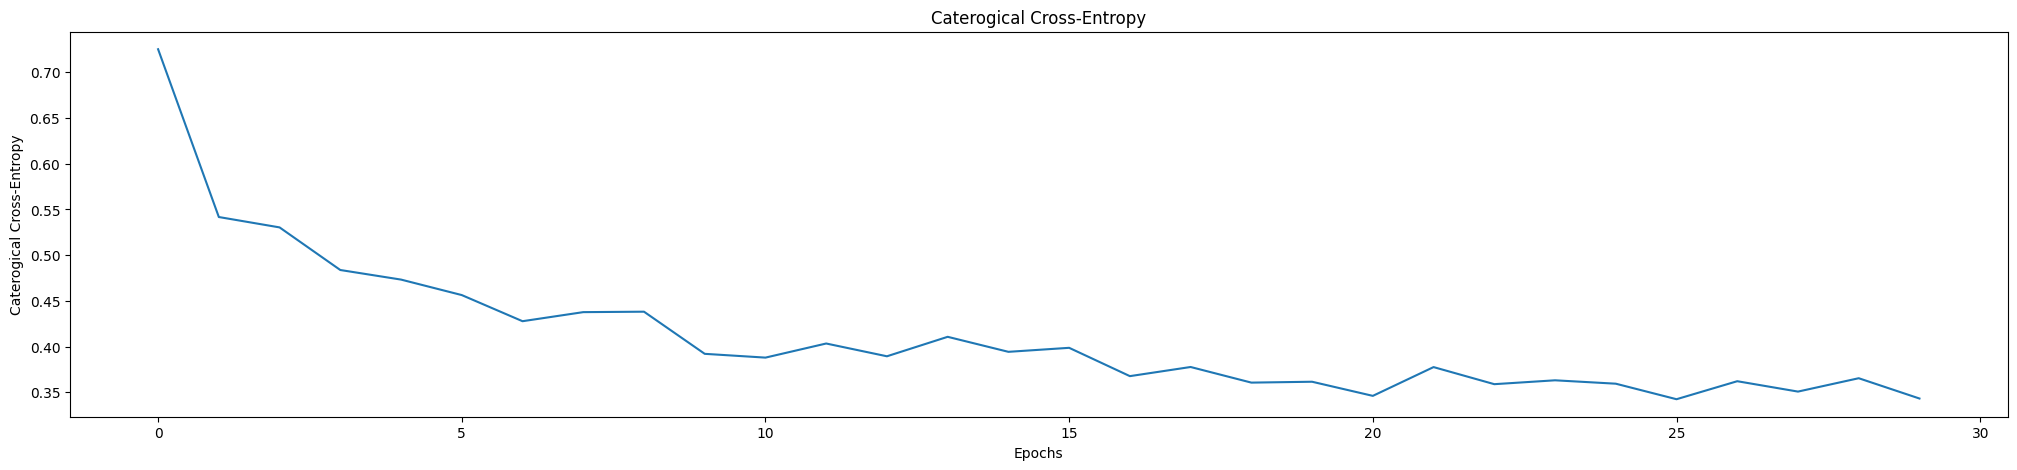

In [37]:
plot_metrics([losses_], ["Caterogical Cross-Entropy"])

In [38]:
prob_train = digits.predict(x_train)

# as this is not a binary classification, we need to use predict_classes and then accuracy
train_pred = metrics.predict_classes(prob_train)
metrics.accuracy(y_train, train_pred)

0.8789

In [39]:
prob_test = digits.predict(x_test)
test_pred = metrics.predict_classes(prob_test)
print("Test Accuracy: ", metrics.accuracy(y_test, test_pred))

Test Accuracy:  0.8522


In [40]:
train_prec = metrics.precision(y_train, train_pred, average="macro")
test_prec = metrics.precision(y_test, test_pred, average="macro")

print(f"Training Precision: {train_prec:.4f}\nTesting Precision:  {test_prec:.4f}")

Training Precision: 0.8808
Testing Precision:  0.8533


In [41]:
metrics.r2_score(y_train, train_pred)

0.8040323232323232

In [42]:
metrics.confusion_matrix(y_train, train_pred)

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,5178,2,91,597,11,2,105,0,14,0
1,2,5876,1,108,10,2,0,0,1,0
2,73,2,4873,151,638,0,251,0,12,0
3,45,93,16,5737,84,0,21,0,4,0
4,6,16,409,441,4772,0,353,0,3,0
5,0,0,1,0,0,5860,1,64,6,68
6,1381,8,617,509,372,1,3094,0,18,0
7,0,0,0,0,0,123,0,5622,6,249
8,15,0,31,53,8,9,38,6,5835,5


In [43]:
metrics.confusion_matrix(y_train, train_pred)

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,5178,2,91,597,11,2,105,0,14,0
1,2,5876,1,108,10,2,0,0,1,0
2,73,2,4873,151,638,0,251,0,12,0
3,45,93,16,5737,84,0,21,0,4,0
4,6,16,409,441,4772,0,353,0,3,0
5,0,0,1,0,0,5860,1,64,6,68
6,1381,8,617,509,372,1,3094,0,18,0
7,0,0,0,0,0,123,0,5622,6,249
8,15,0,31,53,8,9,38,6,5835,5


In [44]:
sk_metrics.confusion_matrix(y_test, test_pred)

array([[822,   2,  13, 124,   2,   0,  28,   0,   9,   0],
       [  0, 965,   1,  29,   3,   0,   2,   0,   0,   0],
       [ 22,   1, 780,  25, 121,   0,  48,   0,   3,   0],
       [ 17,  19,   6, 932,  16,   0,   7,   0,   3,   0],
       [  0,   2, 105,  65, 748,   0,  80,   0,   0,   0],
       [  0,   0,   0,   1,   0, 950,   0,  25,   1,  23],
       [214,   0, 118, 100,  68,   0, 492,   0,   8,   0],
       [  0,   0,   0,   0,   0,  39,   0, 917,   0,  44],
       [  6,   0,   8,  15,   1,   8,   8,   3, 951,   0],
       [  0,   0,   0,   0,   0,   6,   1,  28,   0, 965]])

In [45]:
sk_metrics.confusion_matrix(y_test, test_pred)

array([[822,   2,  13, 124,   2,   0,  28,   0,   9,   0],
       [  0, 965,   1,  29,   3,   0,   2,   0,   0,   0],
       [ 22,   1, 780,  25, 121,   0,  48,   0,   3,   0],
       [ 17,  19,   6, 932,  16,   0,   7,   0,   3,   0],
       [  0,   2, 105,  65, 748,   0,  80,   0,   0,   0],
       [  0,   0,   0,   1,   0, 950,   0,  25,   1,  23],
       [214,   0, 118, 100,  68,   0, 492,   0,   8,   0],
       [  0,   0,   0,   0,   0,  39,   0, 917,   0,  44],
       [  6,   0,   8,  15,   1,   8,   8,   3, 951,   0],
       [  0,   0,   0,   0,   0,   6,   1,  28,   0, 965]])


## Boston Housing (Regression)


In [46]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# normalize the data
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_test)

x_train.shape, x_test.shape

((404, 13), (102, 13))

In [47]:

boston = network()

boston.add(layers.DenseLayer(input_shape=(13), units=20, activation="tanh"))

boston.add(layers.DenseLayer(units=10, activation="tanh"))

boston.add(layers.DropoutLayer(dropout_rate=0.2))

boston.add(layers.DenseLayer(units= 8, activation="tanh", use_bias=False))

boston.add(layers.BatchNormalization(8))

boston.add(layers.DenseLayer(units=1, activation="linear"))

boston.compile(loss=losses.MSE(), optimizer=optimizers.Adam(lr=0.01))

In [48]:
boston.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               13             -              (13, None)     -              -                       0

DenseLayer          20             (13,)          (20,)          (20, 13)       (20, 1)               280

DenseLayer          10             (20,)          (10,)          (10, 20)       (10, 1)               210

DropoutLayer        -              droupout rate: 0.2            -              -                       0

DenseLayer          8              (10,)          (8,)           (8, 10)        0                      80

BatchNormalization  -              epsilon:       1e-08          -              -                       -

DenseLayer          1              (8,)           (1,)           (1, 8)         (1, 1)                  9


In [49]:
boston.fit(x_train, y_train, epochs=100,  batch_size=64, verbose=1)

Epoch 1-100 ======================> cost: 220.2000 
Epoch 11-100 ======================> cost: 28.5444 
Epoch 21-100 ======================> cost: 24.1721 
Epoch 31-100 ======================> cost: 18.7586 
Epoch 41-100 ======================> cost: 14.8702 
Epoch 51-100 ======================> cost: 13.4771 
Epoch 61-100 ======================> cost: 10.4416 
Epoch 71-100 ======================> cost: 8.6858 
Epoch 81-100 ======================> cost: 8.1894 
Epoch 91-100 ======================> cost: 7.3921 


In [50]:
boston_pred = boston.predict(x_train).reshape(-1)
metrics.r2_score(y_train, boston_pred)

0.8322003802989995

***